### Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.5


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


### Carregando os dados

In [5]:
# Carregando o dataset através da função 'read_csv()' do  Pandas
dados = pd.read_csv('dataset.csv')

In [6]:
# Verificando a dimensão dos dados
dados.shape

(9700, 11)

In [7]:
# Amostra das 5 primeiras linhas da tabela
dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [8]:
# Amostra das 5 últimas linhas da tabela
dados.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


### Análise Exploratória

In [9]:
# Verificando as colunas do conjuto de dados
dados.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [10]:
# Verificando o tipo de dado de cada coluna
dados.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [11]:
# Resuo estatístico da coluna com o valor de venda
dados['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [12]:
# Verificando dados duplicados
dados[dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [13]:
# Verificando se há valores ausentes
dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Perguntas de Negócio

### 1. Qual a cidade com maior Valor de Venda de produtos da categoria 'Office Supplies'?

In [14]:
# filtrando os dados pela categoria
dados_p1 = dados[dados['Categoria'] == 'Office Supplies']

In [15]:
# soma do total de vendas agrupado por cidade
dados_p1_total = dados_p1.groupby('Cidade')['Valor_Venda'].sum()

In [16]:
# selecionando a cidade com maior valor de venda através da função 'idxmax()'
maior_venda = dados_p1_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", maior_venda)

Cidade com maior valor de venda para 'Office Supplies': New York City


In [17]:
# Conferindo o resultado, consultando a soma do valor_vendas de cada cidade - descendente
dados_p1_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

### 2. Qual o total de vendas por data do pedido?

In [19]:
# Soma do total de vendas agrupado por 'data_pedido'
dados_p2 = dados.groupby('Data_Pedido')['Valor_Venda'].sum()

In [20]:
# Visualizando as 5 primeiras linhas
dados_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

In [ ]:
# Gráfico de barras a partir do próprio DataFrame
#dimensão da imagem
#eixos e cor
#título do gráfico
#visualização do gráfico

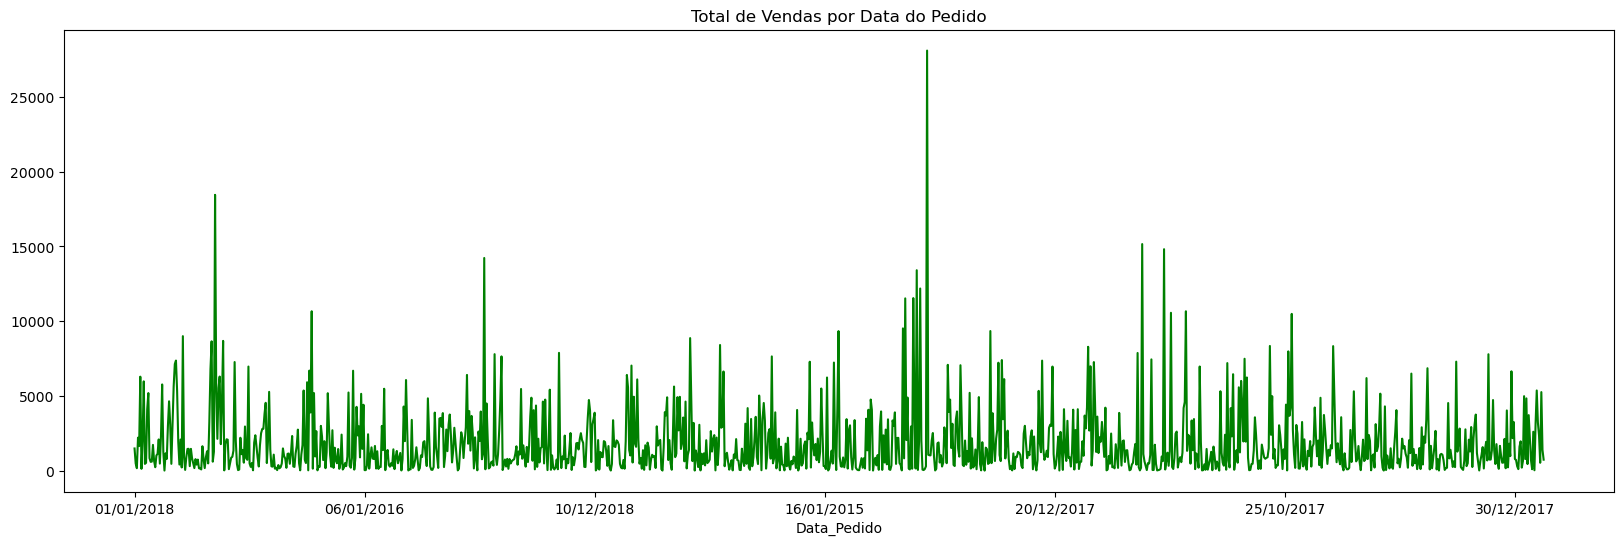

In [21]:
plt.figure(figsize=(20,6)) 
dados_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green') 
plt.title('Total de Vendas por Data do Pedido')
plt.show()

### 3. Qual o total de vendas por estado

In [22]:
# Soma das vendas agrupado por Estado
dados_p3 = dados.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [23]:
# A função **reset_index()** no seu código é utilizada para transformar o índice (que é o 'Estado' no seu caso) de volta em uma coluna do DataFrame. Isso é necessário para que, ao criar um gráfico de barras com Seaborn, você possa referenciar essa coluna como a variável no eixo x. Se não usar reset_index(), o índice da série seria considerado como o eixo x, o que pode levar a resultados inesperados ou erros. Portanto, o uso de reset_index() é crucial para garantir a correta representação dos dados no gráfico.

In [24]:
# Visualização das 5 primeiras linhas 
dados_p3.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


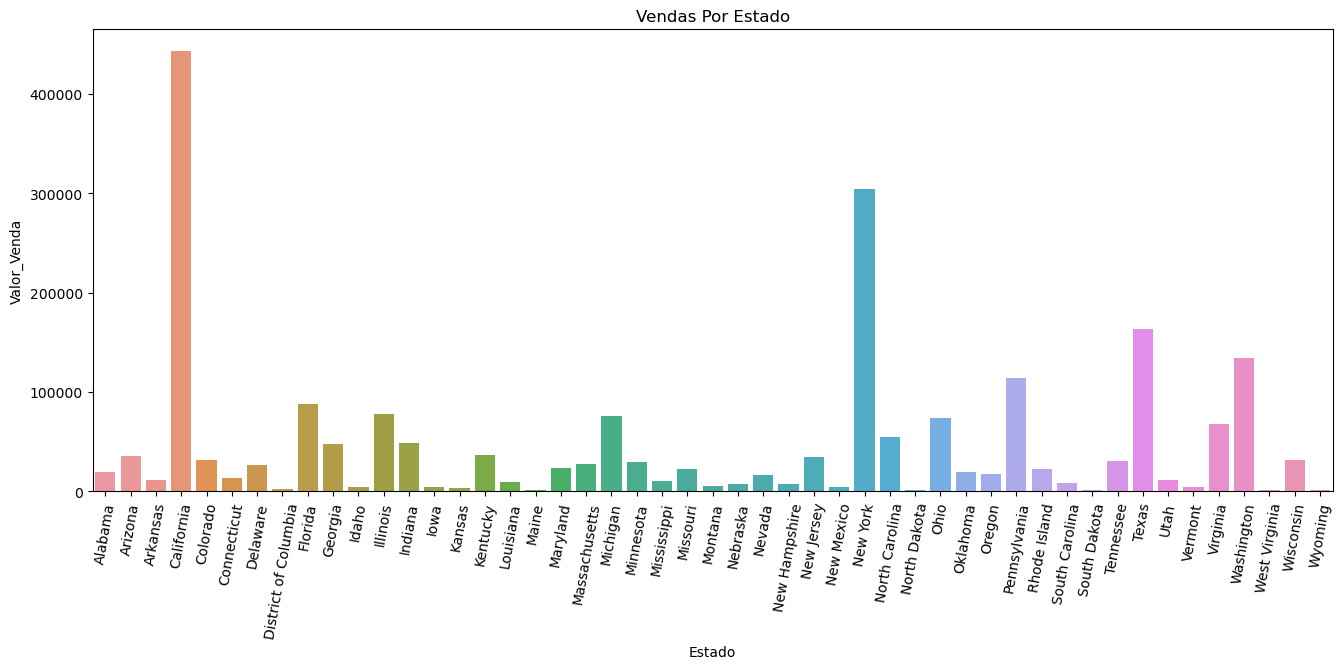

In [25]:
# Gráfico de barras com seaborn(barplot)

plt.figure(figsize = (16,6))
sns.barplot(data = dados_p3,
           y = 'Valor_Venda',
           x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80) #rotacionado para melhor visibilidade
plt.show()

### 4. Quais são as 10 cidades com maior total de vendas?


In [26]:
# Soma do Valor de Venda agrupado por cidade
# dados_p4 = dados.groupby('Cidade')['Valor_Venda'].sum()

In [ ]:
# Transformando a 'série Cidade' em 'coluna cidade' novamente
# .reset_index()

In [ ]:
# Ordenado os valores da coluna 'valor_venda' em ordem decrescente de delimitando aos 10 primeiros
#.sort_values(by = 'Valor_Venda', ascending = False).head(10)

In [27]:
dados_p4 = dados.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

In [28]:
dados_p4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


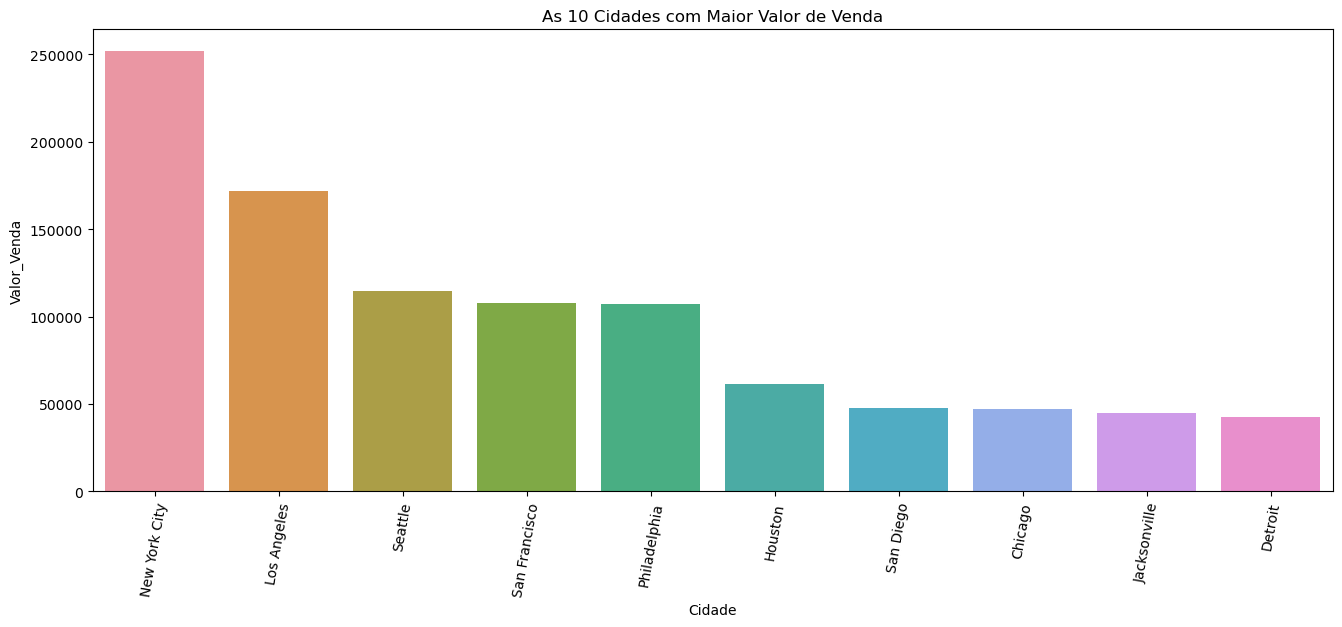

In [29]:
# Gráfico de barras com seaborn(barplot)

plt.figure(figsize = (16,6))
sns.set_palette('coolwarm') #especificar a paleta de cores da barra
sns.barplot(data = dados_p4,
           y = 'Valor_Venda',
           x = 'Cidade').set(title = 'As 10 Cidades com Maior Valor de Venda')
plt.xticks(rotation = 80) #rotacionado para melhor visibilidade
plt.show()

### 5. Qual o segmento teve o maior total de vendas?

In [30]:
dados_p5 = dados.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)

In [31]:
dados_p5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [32]:
# função para converter os dados que estão em notação cientifica para valor absoluto

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '$ {v:d}'.format(v=val)
    return my_format

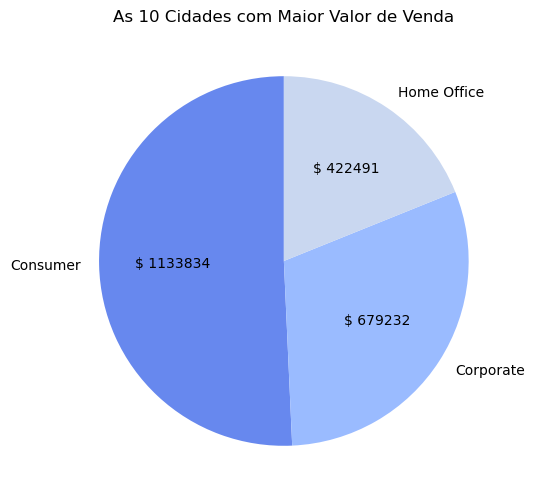

In [33]:
# Gráfico de pizza com matplotlib

plt.figure(figsize = (16,6))
plt.pie(dados_p5['Valor_Venda'],
        labels = dados_p5['Segmento'],
        autopct = autopct_format(dados_p5['Valor_Venda']),
        startangle = 90)
plt.title('As 10 Cidades com Maior Valor de Venda')
plt.show()


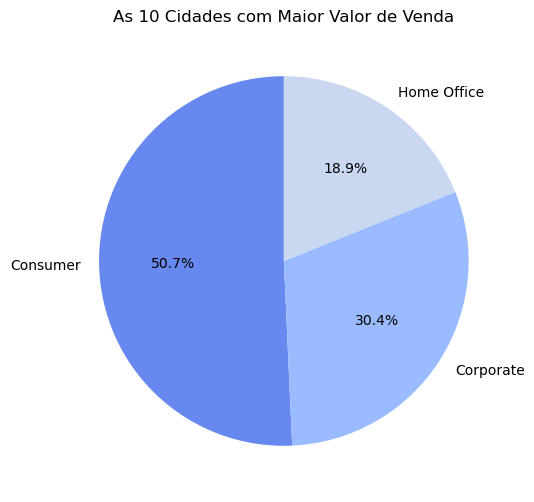

In [34]:
# Gráfico de barras com seaborn(barplot)

plt.figure(figsize = (16,6))
plt.pie(dados_p5['Valor_Venda'],
        labels = dados_p5['Segmento'],
        autopct = '%1.1f%%', #valor em porcentagem
        startangle = 90)
plt.title('As 10 Cidades com Maior Valor de Venda')
plt.show()

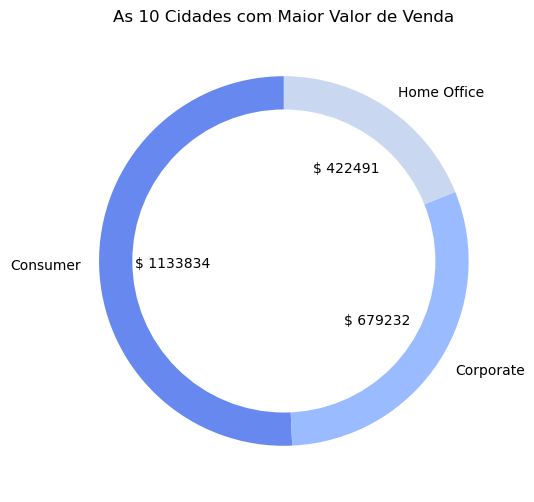

In [35]:
# Gráfico de disco com matplotlib

plt.figure(figsize = (16,6))
plt.pie(dados_p5['Valor_Venda'],
        labels = dados_p5['Segmento'],
        autopct = autopct_format(dados_p5['Valor_Venda']),
        startangle = 90)

centre_circle = plt.Circle((0,0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('As 10 Cidades com Maior Valor de Venda')
plt.show()

### 6. Qual o total de vendas por segmento e por ano?

In [37]:
# Converção da coluna 'data_pedido' que está no tipo object para data com a função datetime()
dados['Data_Pedido'] = pd.to_datetime(dados['Data_Pedido'], dayfirst = True)

In [38]:
dados.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [39]:
# "extrair" o ano e armazenar em uma nova coluna - dt.year
dados['Ano'] = dados['Data_Pedido'].dt.year

In [40]:
# Verificando a nova coluna
dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [41]:
dados_p6 = dados.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [42]:
dados_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

### 7. Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
 
 * Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
 
 * Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
 
**Quantas vendas receberiam 15% de desconto?**

In [43]:
# numpy c/ pandas para criar condicional
# criar nova coluna para valor do desconto
dados['Desconto'] = np.where(dados['Valor_Venda'] > 1000, 0.15, 0.10)

In [44]:
dados.head(15)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.10
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.10
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.10
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.10
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,0.10
6,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,2015,0.10
7,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,2015,0.10
8,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,2015,0.10
9,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,2015,0.10


In [45]:
dados['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

### 8. Considere que a empresa decida conceder o desconto de 15%, como apresentado na questão anterior. Qual seria a média do 'valor_venda' dessas vendas antes e depois do desconto?


In [47]:
# Sendo o desconto de 15%, o 'valor_venda' passa a ser 85% do valor
dados['Valor_Venda_Desconto'] = dados['Valor_Venda'] - (dados['Valor_Venda'] * dados['Desconto'])

In [48]:
dados.head(15)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.10,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.10,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.10,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.10,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.10,20.13120
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,0.10,43.97400
6,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,2015,0.10,6.55200
7,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,2015,0.10,816.43680
8,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,2015,0.10,16.65360
9,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,2015,0.10,103.41000


In [49]:
# Localizar 'valor_venda' que receberiam 15% - antes do desconto
dados_vendas_antes = dados.loc[dados['Desconto'] == 0.15, 'Valor_Venda']
dados_media_antes = round(dados_vendas_antes.mean(), 2)
dados_media_antes

2116.81

In [51]:
# Localizar 'valor_venda' que receberiam 15% - depois do desconto
dados_vendas_depois = dados.loc[dados['Desconto'] == 0.15, 'Valor_Venda_Desconto']
dados_media_depois = round(dados_vendas_depois.mean(), 2)
dados_media_depois

1799.29

### 9. Qual o média de vendas por Segmento, Ano e Mês?


In [52]:
# "extrair" o mês e armazenar em uma nova coluna - dt.year
dados['Mes'] = dados['Data_Pedido'].dt.month

In [53]:
dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [54]:
dados_p9 = dados.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].mean()

In [55]:
dados_p9


Ano   Mes  Segmento   
2015  1    Consumer       146.736787
           Corporate      130.886769
           Home Office    329.855882
      2    Consumer       117.327926
           Corporate       69.235333
                             ...    
2018  11   Corporate      341.215278
           Home Office    247.519423
      12   Consumer       183.616244
           Corporate      153.167403
           Home Office    224.523983
Name: Valor_Venda, Length: 144, dtype: float64

In [56]:
# Vamos extrair os níveis da variaveis categóricas
anos = dados_p9.index.get_level_values(0)
meses = dados_p9.index.get_level_values(1)
segmentos = dados_p9.index.get_level_values(2)

C:\Users\nadin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

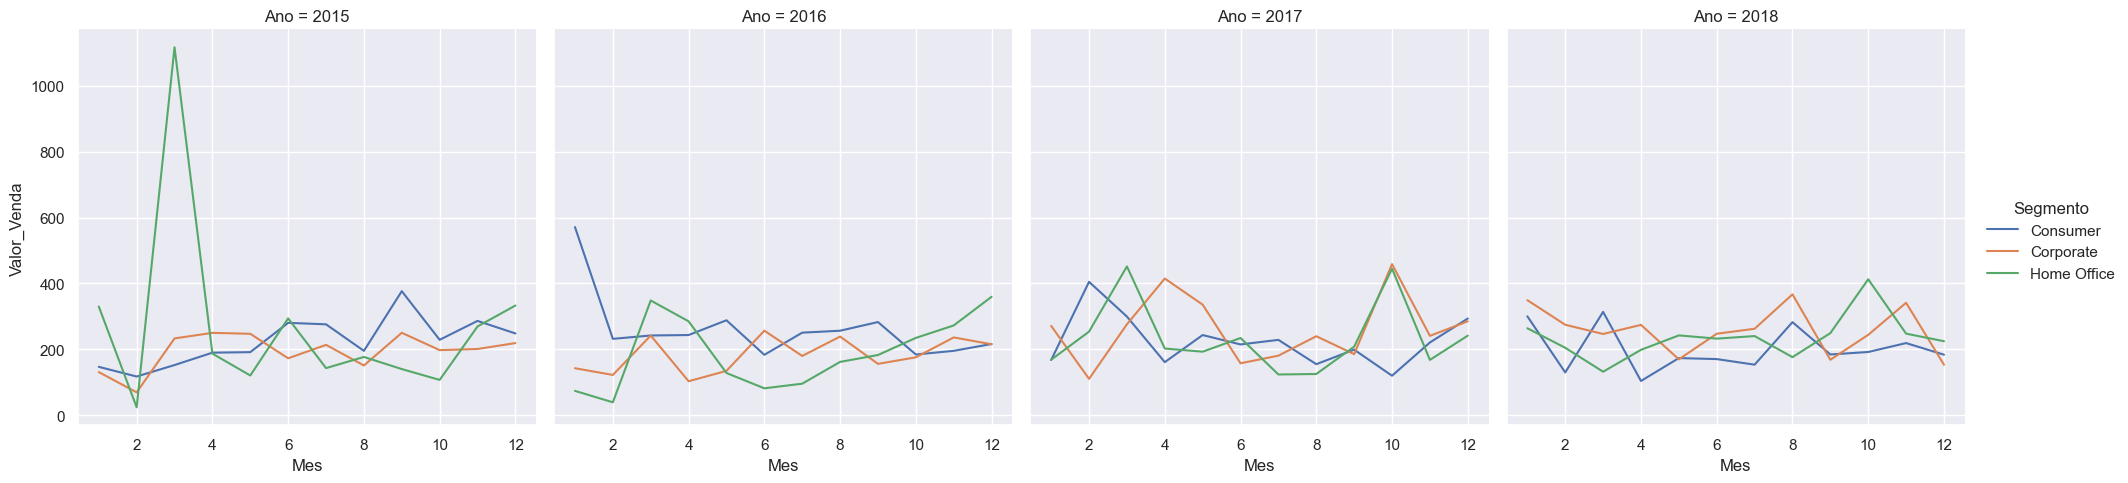

In [57]:
# Plot
# relplot - grafico relacional
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = dados_p9, 
                   y = dados_p9, 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

 ### 10. Qual o total de vendas por Categoria e SubCategoria, considerando somente as Top 12 SubCategorias? 
 Demonstre tudo através de um único gráfico.

In [58]:
dados_p10 = dados.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [59]:
dados_p10

Valor_Venda      Ano  Desconto  \
Categoria       SubCategoria                                   
Technology      Phones        325271.2940  1748496     90.15   
Furniture       Chairs        317919.6250  1201942     63.30   
Office Supplies Storage       216188.3620  1663791     84.75   
Furniture       Tables        202083.3600   627193     34.15   
Office Supplies Binders       194723.3810  2964618    149.10   
Technology      Machines      189238.6310   231912     13.65   
                Accessories   162791.3620  1504508     76.10   
                Copiers       146248.0940   133104      8.30   
Furniture       Bookcases     108045.0467   449734     23.50   
Office Supplies Appliances    104061.6930   915604     46.45   
Furniture       Furnishings    88862.7700  1865489     92.75   
Office Supplies Paper          76312.7640  2680255    132.90   

                              Valor_Venda_Desconto    Mes  
Categoria       SubCategoria                               
Technology      Phones                286990.85830   6649  
Furniture       Chairs                279816.75990   4834  
Office Supplies Storage               191433.27010   6548  
Furniture       Tables                176938.45555   2466  
Office Supplies Binders               169623.33495  11451  
Technology      Machines              162213.65840    897  
                Accessories           144162.61990   5982  
                Copiers               125379.85260    516  
Furniture       Bookcases              95035.86235   1706  
Office Supplies Appliances             91938.64420   3583  
Furniture       Furnishings            79694.54640   7301  
Office Supplies Paper                  68681.48760  10404

In [60]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
dados_p10 = dados_p10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [61]:
# Dataframe com categorias e subcategorias
dados_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [62]:
# Criamos outro dataframe somente com os totais por categoria
dados_p10_cat = dados_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [63]:
dados_p10_cat


,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [64]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [65]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

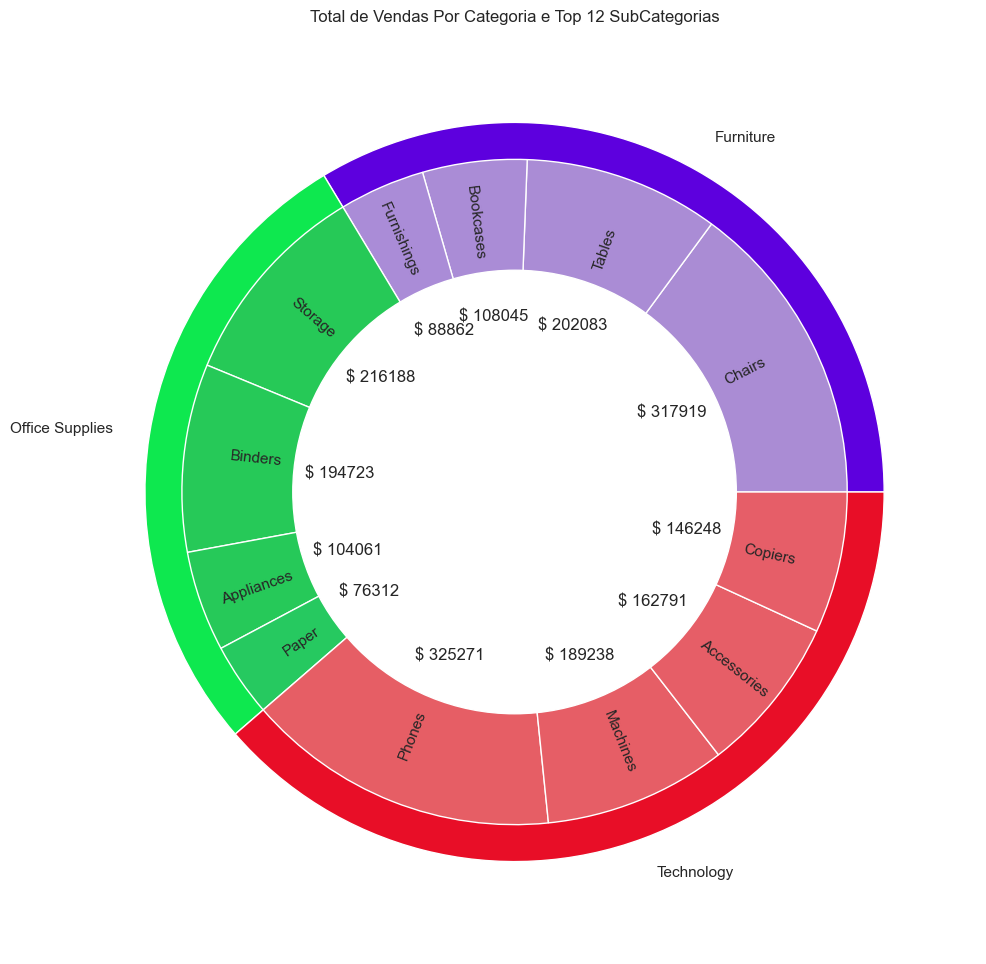

In [66]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(dados_p10_cat['Valor_Venda'], 
            radius = 1,
            labels = dados_p10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'), #divisão entre categorias
            colors = cores_categorias) # definidas acima

# Gráfico das subcategorias
p2 = ax.pie(dados_p10['Valor_Venda'],
            radius = 0.9,
            labels = dados_p10['SubCategoria'],
            autopct = autopct_format(dados_p10['Valor_Venda']), #formatação dos dados
            colors = cores_subcategorias, #definidas acima
            labeldistance = 0.7, 
            wedgeprops = dict(edgecolor = 'white'), #divisão entre as subcategorias
            pctdistance = 0.53,
            rotatelabels = True) #rotação dos rotulos

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()